In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

### The steps of the modeling pipeline

1. Create features to best reflect the meaning behind data
2. Create model appropriate to capture relationships between features
    - e.g. linear, non-linear
3. Select a loss function and fit the model (determine $\hat{\theta}$).
4. Evaluate model (e.g. using RMSE)

After these steps, use the model for prediction and/or inference.

In [6]:
# initialize the transformer and use it in the dataset
from sklearn.preprocessing import Binarizer

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
bi = Binarizer(threshold = 20)                     # initialize with the parameter
binarized = bi.transform(tips[['total_bill']])     # called transform on a data 
binarized[:5]

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.]])

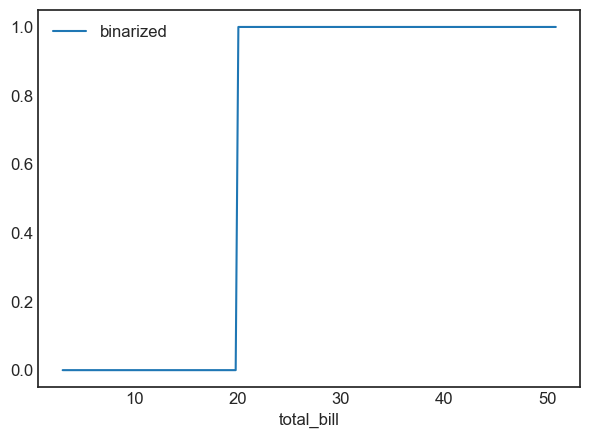

In [8]:
# check if works
# 
(
    pd.concat([tips.total_bill, pd.DataFrame(binarized, columns=['binarized'])], axis=1)
    .sort_values('total_bill')
    .plot(x='total_bill', y='binarized')
);

In [9]:
from sklearn.preprocessing import StandardScaler

tips = sns.load_dataset('tips')
quantcols = ['total_bill', 'size', 'tip']
tips[quantcols].head()

,total_bill,size,tip
0,16.99,2,1.01
1,10.34,3,1.66
2,21.01,3,3.50
3,23.68,2,3.31
4,24.59,4,3.61


In [10]:
stdscaler = StandardScaler()

In [12]:
stdscaler.fit(tips[quantcols])

StandardScaler()

In [15]:
# z-scaled data
stdscaler.transform(tips[quantcols])

array([[-3.14711305e-01, -6.00192629e-01, -1.43994695e+00],
       [-1.06323531e+00,  4.53382921e-01, -9.69205340e-01],
       [ 1.37779900e-01,  4.53382921e-01,  3.63355539e-01],
       [ 4.38315103e-01, -6.00192629e-01,  2.25754144e-01],
       [ 5.40744704e-01,  1.50695847e+00,  4.43019505e-01],
       [ 6.19536705e-01,  1.50695847e+00,  1.23965916e+00],
       [-1.23995452e+00, -6.00192629e-01, -7.22971264e-01],
       [ 7.98507107e-01,  1.50695847e+00,  8.81527488e-02],
       [-5.34203307e-01, -6.00192629e-01, -7.51939979e-01],
       [-5.63468908e-01, -6.00192629e-01,  1.67816714e-01],
       [-1.07111451e+00, -6.00192629e-01, -9.32994446e-01],
       [ 1.74175992e+00,  1.50695847e+00,  1.44968234e+00],
       [-4.91430507e-01, -6.00192629e-01, -1.03438495e+00],
       [-1.52624903e-01,  1.50695847e+00,  1.24660453e-03],
       [-5.57840908e-01, -6.00192629e-01,  1.57309619e-02],
       [ 2.01939101e-01, -6.00192629e-01,  6.67527044e-01],
       [-1.06436091e+00,  4.53382921e-01

## One-Hot Encoding

In [83]:
# just categoricals
from sklearn.preprocessing import OneHotEncoder

tips_cat = ['sex', 'smoker', 'day', 'time']
regdata = tips[tips_cat]
regdata.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [84]:
ohe = OneHotEncoder() 
ohe.fit(regdata)       
ohe.categories_       

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
ohe = OneHotEncoder(drop='first')
features = ohe.fit_transform(tips[tips_cat])

In [87]:
features.toarray()

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       ...,
       [1., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [88]:
ohe.get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Sat', 'x2_Sun', 'x2_Thur', 'x3_Lunch'],
      dtype=object)

In [89]:
lr = LinearRegression()
lr.fit(features, tips.tip)

LinearRegression()

In [90]:
preds = lr.predict(features)

In [91]:
# doesn't affect RMSE, but makes the individual weights on features more stable
np.sqrt(np.mean((preds - tips.tip.values)**2))

1.361683846651701

In [92]:
tips.assign(preds=preds)

,total_bill,tip,sex,smoker,day,time,size,preds
0,16.99,1.01,Female,No,Sun,Dinner,2,3.104154
1,10.34,1.66,Male,No,Sun,Dinner,3,3.274363
2,21.01,3.50,Male,No,Sun,Dinner,3,3.274363
3,23.68,3.31,Male,No,Sun,Dinner,2,3.274363
4,24.59,3.61,Female,No,Sun,Dinner,4,3.104154
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.007175
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.921291
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.091500
242,17.82,1.75,Male,No,Sat,Dinner,2,3.007175


## Pipelines

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
# pipelines are lists of steps: each is a transformation/estimator
# each transformation is a tuple: the 'name' for the step name, and the transformer/estimator object.
pl = Pipeline([
    ('one-hot', OneHotEncoder()),
    ('lin-reg', LinearRegression())
])

In [45]:
regdata.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [46]:
pl.fit(regdata, tips.tip)

Pipeline(steps=[('one-hot', OneHotEncoder()), ('lin-reg', LinearRegression())])

In [49]:
pl.predict(regdata)[:10]

array([3.10415414, 3.27436302, 3.27436302, 3.27436302, 3.10415414,
       3.27436302, 3.27436302, 3.27436302, 3.27436302, 3.27436302])

In [50]:
# R^2 -- still terrible! (1 is good, 0 is bad)
pl.score(regdata, tips.tip)

0.027496790201475663

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as pp

In [52]:
# 1. split data up into quant. and cat. features
# 2. z-scale for quant features
# 3. One-hot encode for cat. features
# 4. Two pipelines
# 5. Use column transformer to put everything back
# 6. Apply the model => predictions

In [53]:
tips.drop(['tip', 'total_bill', 'size'], axis=1).head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [54]:
# Numeric columns and associated transformers
num_feat = ['total_bill', 'size']
num_transformer = Pipeline(steps=[
    ('scaler', pp.StandardScaler())   # z-scale
])

# Categorical columns and associated transformers
cat_feat = ['sex', 'smoker', 'day', 'time']
cat_transformer = Pipeline(steps=[
    ('onehot', pp.OneHotEncoder())     # output from Ordinal becomes input to OneHot
])

# preprocessing pipeline (put them together)
preproc = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_feat),
        ('cat', cat_transformer, cat_feat)
    ])

pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', LinearRegression())])

In [55]:
pl.fit(tips.drop('tip', axis=1), tips.tip)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['total_bill', 'size']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('regressor', LinearRegression())])

In [56]:
preds = pl.predict(tips.drop('tip', axis=1))
preds[:10]

array([2.73565486, 2.25086733, 3.25904369, 3.33533199, 3.80574011,
       3.83944008, 1.92653073, 3.98967441, 2.51896426, 2.49439764])

In [57]:
np.sqrt(np.mean((preds - tips.tip)**2))

1.0051634500049158

In [58]:
pl.score(tips.drop('tip', axis=1), tips.tip)

0.47007812322060794

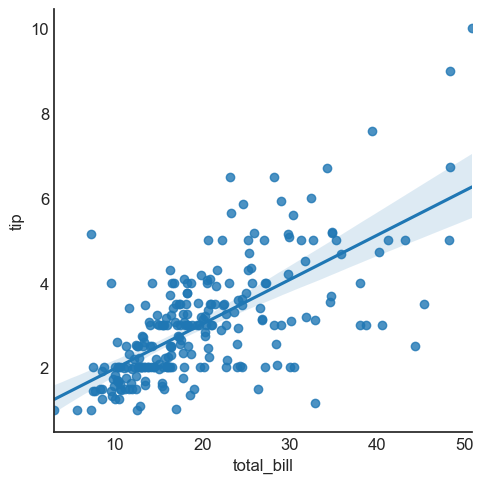

In [60]:
sns.lmplot(data=tips, x='total_bill', y='tip');

## Train Test Split Pipeline

In [93]:
from sklearn.model_selection import train_test_split 

X = tips.drop(['tip', 'sex', 'smoker', 'day', 'time' ], axis=1)
y = tips.tip

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


pl = Pipeline([
   ('lin-reg', LinearRegression())
])

pl.fit(X_train, y_train)

# performance on training data
pred_train = pl.predict(X_train)
rmse_train = np.sqrt(np.mean((pred_train - y_train)**2))

# performance on test data -- what we really care about
pred_test = pl.predict(X_test)
rmse_test = np.sqrt(np.mean((pred_test - y_test)**2))

print ("train RMSE: %s" % rmse_train)
print ("test RMSE: %s" % rmse_test)

train RMSE: 0.977726307648412
test RMSE: 1.0942004254791775
